<a href="https://colab.research.google.com/github/nithishbabu/salary-satisfaction/blob/main/Copy_of_zomato_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [ ]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
data.shape

(51717, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

COLUMNS


In [ ]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

NO.OF NULL VALUES IN EACH

In [ ]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#dropping the unwanted columns

In [ ]:
data=data.drop(['url','address','phone','dish_liked','menu_item','reviews_list'], axis=1)
data.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
data.shape

(51717, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [ ]:
#removing duplicates
data.drop_duplicates(inplace=True)
data.shape

#ANALYZING ALL THE COLUMNS

In [ ]:
#features need to understand Easily so
data.rename(columns={'approx_cost(for two people)':'costfor2plates', 'listed_in(type)':'type', 'listed_in(city)':'city'}, inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2plates,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#Data cleaning

In [ ]:
#rate column
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#we have 3 string values we have to remove it(new,nan,-)
def rate(value):
  if(value=='NEW' or value=='-'):
    return np.nan
  else:
    value=str(value).split('/')
    value=value[0]
    return float(value)
data['rate']=data['rate'].apply(rate)
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

##Filling null values with mean in rate COLUMNS



In [ ]:
data['rate'].fillna(data['rate'].mean(), inplace =True)
data['rate'].isnull().sum()

0

##dropping null values in whole dataset as they are very small

In [ ]:
data.dropna(inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

#we have both city and loaction, lets keep ***one*** ***only***

In [ ]:
data=data.drop(['city'], axis=1)


In [ ]:
data['costfor2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

#***Removing*** commas because it represents as ***strings***

In [ ]:
def removecomma(value):
  value==str(value)
  if "," in value:
    value=value.replace(",", '')
    return float(value)
  else:
    return float(value)
data['costfor2plates']=data['costfor2plates'].apply(removecomma)
data['costfor2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

#cleaning location column

In [ ]:
data['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

#Making a seperate group for locations which are having lessthan 300 restaurants

In [ ]:
location=data['location'].value_counts(ascending=False)
location_lessthan300=location[location<300]

In [ ]:
def location(value):
  if(value in location_lessthan300):
    return "others"
  else:
    return value
data['location']=data['location'].apply(location)
data['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

#Now REST TYPE column

In [ ]:
data['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Cafe, Food Court                  2
Food Court, Beverage Shop         2
Pop Up                            2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

#Here we can see some types which are very less so we make a group of types which are less than 1000 

In [ ]:
rest_types=data["rest_type"].value_counts(ascending=False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Cafe, Food Court                  2
Food Court, Beverage Shop         2
Pop Up                            2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [ ]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Cafe, Food Court                2
Food Court, Beverage Shop       2
Pop Up                          2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 85, dtype: int64

#changing those less than 1000 into others

In [ ]:
def rest_type(value):
  if(value in rest_types_lessthan1000):
    return "others"
  else:
    return value
data['rest_type']=data['rest_type'].apply(rest_type)
data['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

#cleaning cuisines column 

In [ ]:
cuisines=data['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]

In [ ]:
def cuisines(value):
  if(value in cuisines_lessthan100):
    return "others"
  else:
    return value
data['cuisines']=data['cuisines'].apply(cuisines)
data['cuisines'].value_counts()

others                                 35170
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
Bakery, Desserts                         898
Fast Food                                796
Desserts                                 754
Cafe                                     725
South Indian, North Indian, Chinese      724
Bakery                                   649
Chinese                                  552
Ice Cream, Desserts                      415
Chinese, North Indian                    405
Mithai, Street Food                      363
Desserts, Ice Cream                      349
North Indian, Chinese, Biryani           345
South Indian, North Indian               337
North Indian, South Indian               329
North Indian, South Indian, Chinese      305
Name: cuisines, dtype: int64

#Type column

In [ ]:
data['type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: type, dtype: int64

#Data cleaning is done, lets see Visualization


#Visualising online order

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


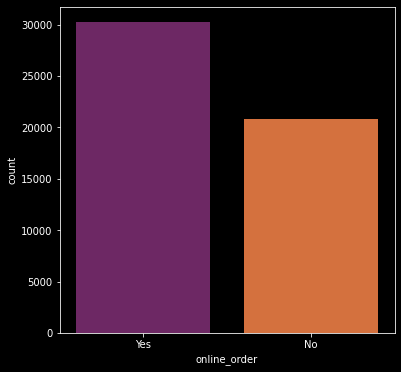

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data['online_order'], palette='inferno')

#Visualsing book table 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


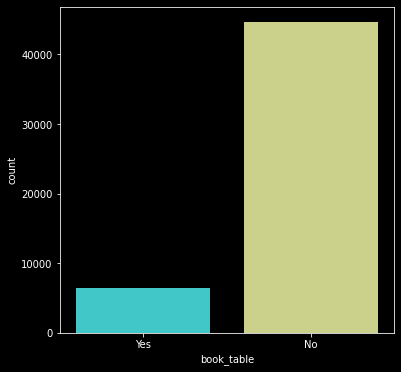

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data['book_table'], palette= 'rainbow')


This says most of the restaurants not having booking table facility

#Visualising locations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

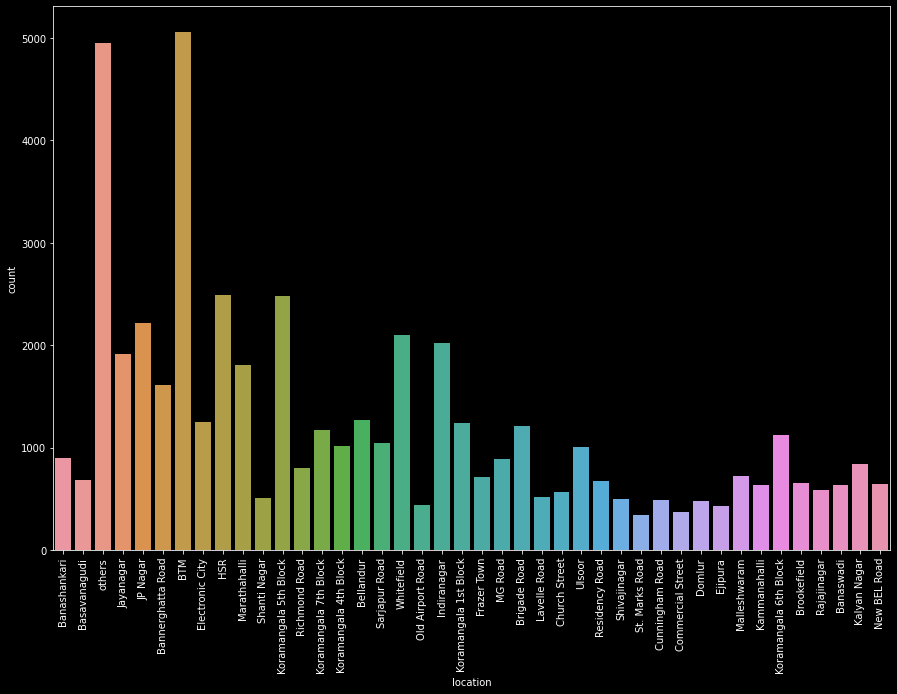

In [ ]:
plt.figure(figsize=(15,10))
axis=sns.countplot(data['location'])
plt.xticks(rotation=90)

This says  that which location having no. of restaurants in area

#visualising Book table vs rate 

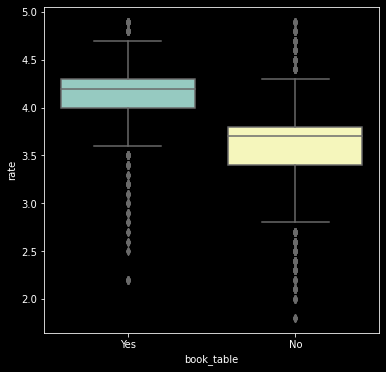

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x="book_table",y="rate", data =data)

Here's the difference is high because, restaurants having book table facility rating is higher than restaurants not having book table facility.

#visualising online order

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


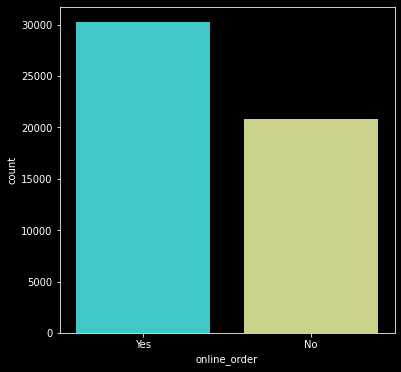

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data['online_order'], palette='rainbow')

From this we can see that most of them having online order facility.


#visualsing online order vs rate(rating)

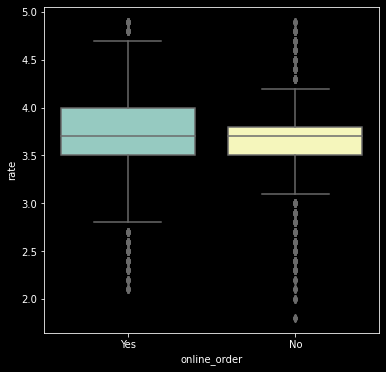

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

This says that restaurants having online order facility rating is higher than not having online order facility

In [ ]:
#visualsing online order facility, location wise

In [ ]:
data1=data.groupby(['location','online_order'])['name'].count()
data1.to_csv('location_online.csv')
data1=pd.read_csv('location_online.csv')
data1=pd.pivot_table(data1, values=None, index=['location'], columns=['online_order'],fill_value=0, aggfunc=np.sum)
data1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

This says that which location having no. of online order and not having online order in restaurants

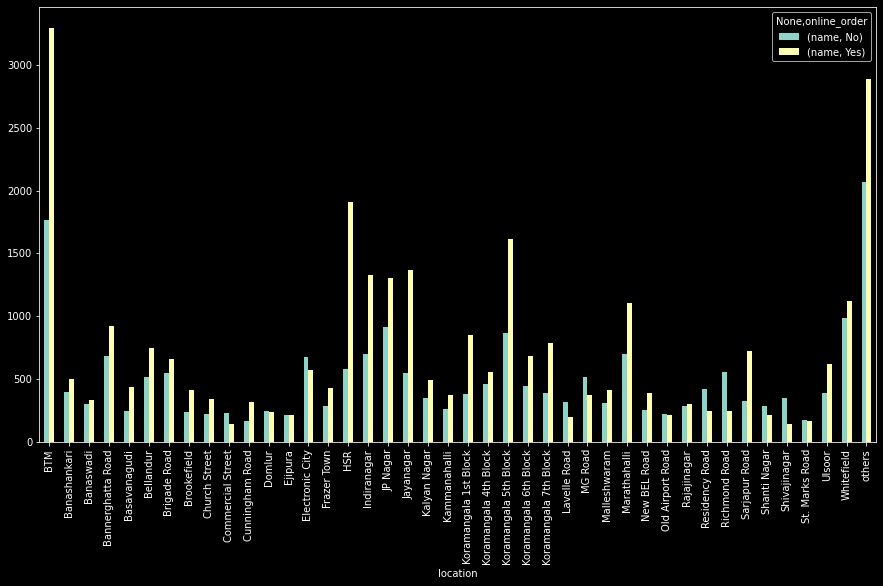

In [ ]:
data1.plot(kind='bar', figsize=(15,8))

#visualsing book table facility, location wise

In [ ]:
data2=data.groupby(["location","book_table"])["name"].count()
data2.to_csv('location_booktable.csv')
data2=pd.read_csv('location_booktable.csv')
data2=pd.pivot_table(data2, values=None, index=["location"], columns=['book_table'],fill_value=0, aggfunc=np.sum)
data2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

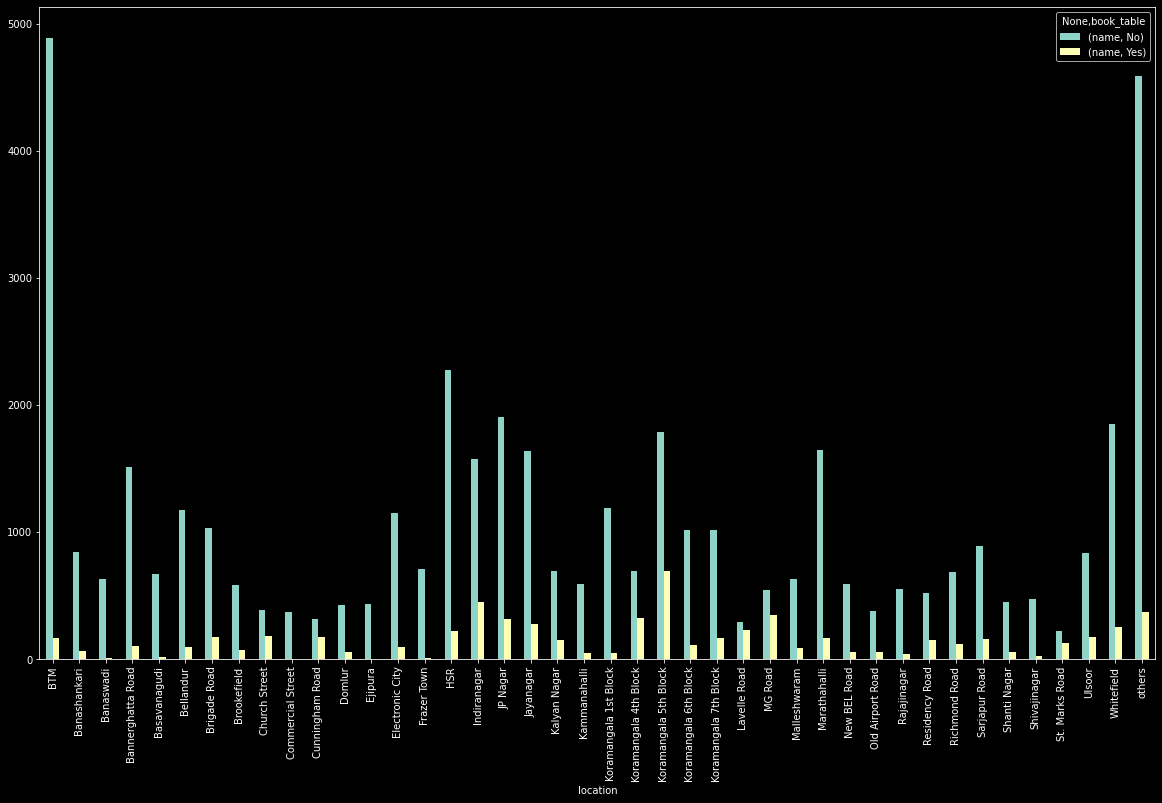

In [ ]:
data2.plot(kind='bar', figsize=(20,12))

#Restaurants vs rate

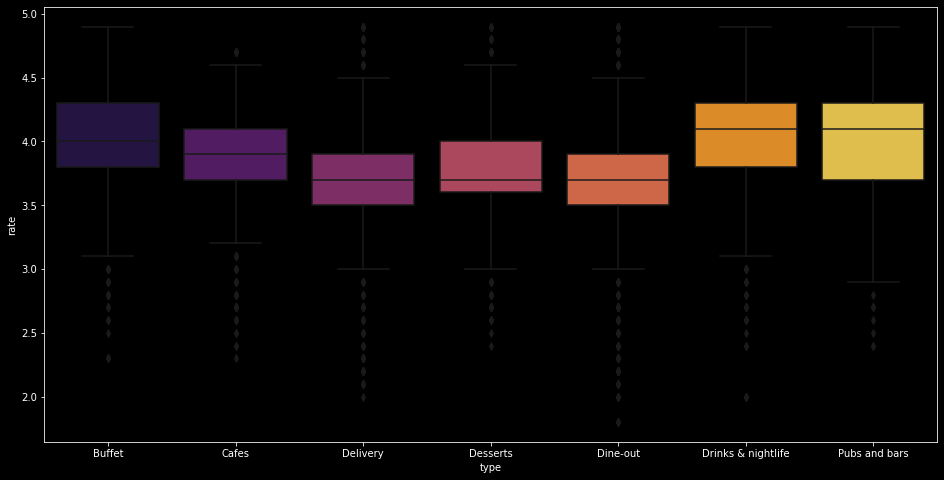

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='type',y='rate', data=data, palette="inferno")

Here we can see that drinks and night life restaurants and pubs and bars are getting high rating compared to others

#clustering types of restaurants, location wise

In [ ]:
data3=data.groupby(['location','type'])['name'].count()
data3.to_csv('location_type.csv')
data3=pd.read_csv("location_type.csv")
data3=pd.pivot_table(data3, values=None, index=['location'], columns=["type"],fill_value=0, aggfunc=np.sum)
data3

name        ...                                 
type                  Buffet Cafes  ... Drinks & nightlife Pubs and bars
location                            ...                                 
BTM                       21    83  ...                 22            19
Banashankari               7    36  ...                 14             0
Banaswadi                  0    24  ...                  6             1
Bannerghatta Road          9    46  ...                  9             2
Basavanagudi               7    11  ...                  5             0
Bellandur                 28    36  ...                 17            16
Brigade Road              25    46  ...                 57            22
Brookefield                6    17  ...                  4             0
Church Street             19    51  ...                 36            23
Commercial Street          0    13  ...                  0             0
Cunningham Road           29    34  ...                 16             7
Domlur                    15    13  ...                 12            11
Ejipura                    0     0  ...                  0             0
Electronic City           23    24  ...                 21            21
Frazer Town                1    11  ...                  2             2
HSR                       19    49  ...                 14            18
Indiranagar               38    97  ...                 65            66
JP Nagar                  45    76  ...                 51             7
Jayanagar                 27    77  ...                 12             0
Kalyan Nagar               9    45  ...                 18             0
Kammanahalli               2    27  ...                  6             0
Koramangala 1st Block      3    26  ...                  7            16
Koramangala 4th Block     21    53  ...                 62            34
Koramangala 5th Block     65   146  ...                 84            58
Koramangala 6th Block     18    43  ...                 51            23
Koramangala 7th Block     25    52  ...                 25            25
Lavelle Road              30    27  ...                 59            34
MG Road                   51    76  ...                 53            36
Malleshwaram              11    31  ...                 20            14
Marathahalli              34    32  ...                 22             2
New BEL Road               4    29  ...                  8             8
Old Airport Road          12     5  ...                 12             9
Rajajinagar               10     4  ...                  3            10
Residency Road            20    31  ...                 55            26
Richmond Road             63    21  ...                 16            12
Sarjapur Road             25    22  ...                 19            22
Shanti Nagar               9    22  ...                  9             2
Shivajinagar               6    17  ...                  7             8
St. Marks Road             5    10  ...                 40            22
Ulsoor                    16    56  ...                 23            30
Whitefield                28    51  ...                 47            33
others                    83   133  ...                 75            47

[42 rows x 7 columns]

we can see all types regarding all locations

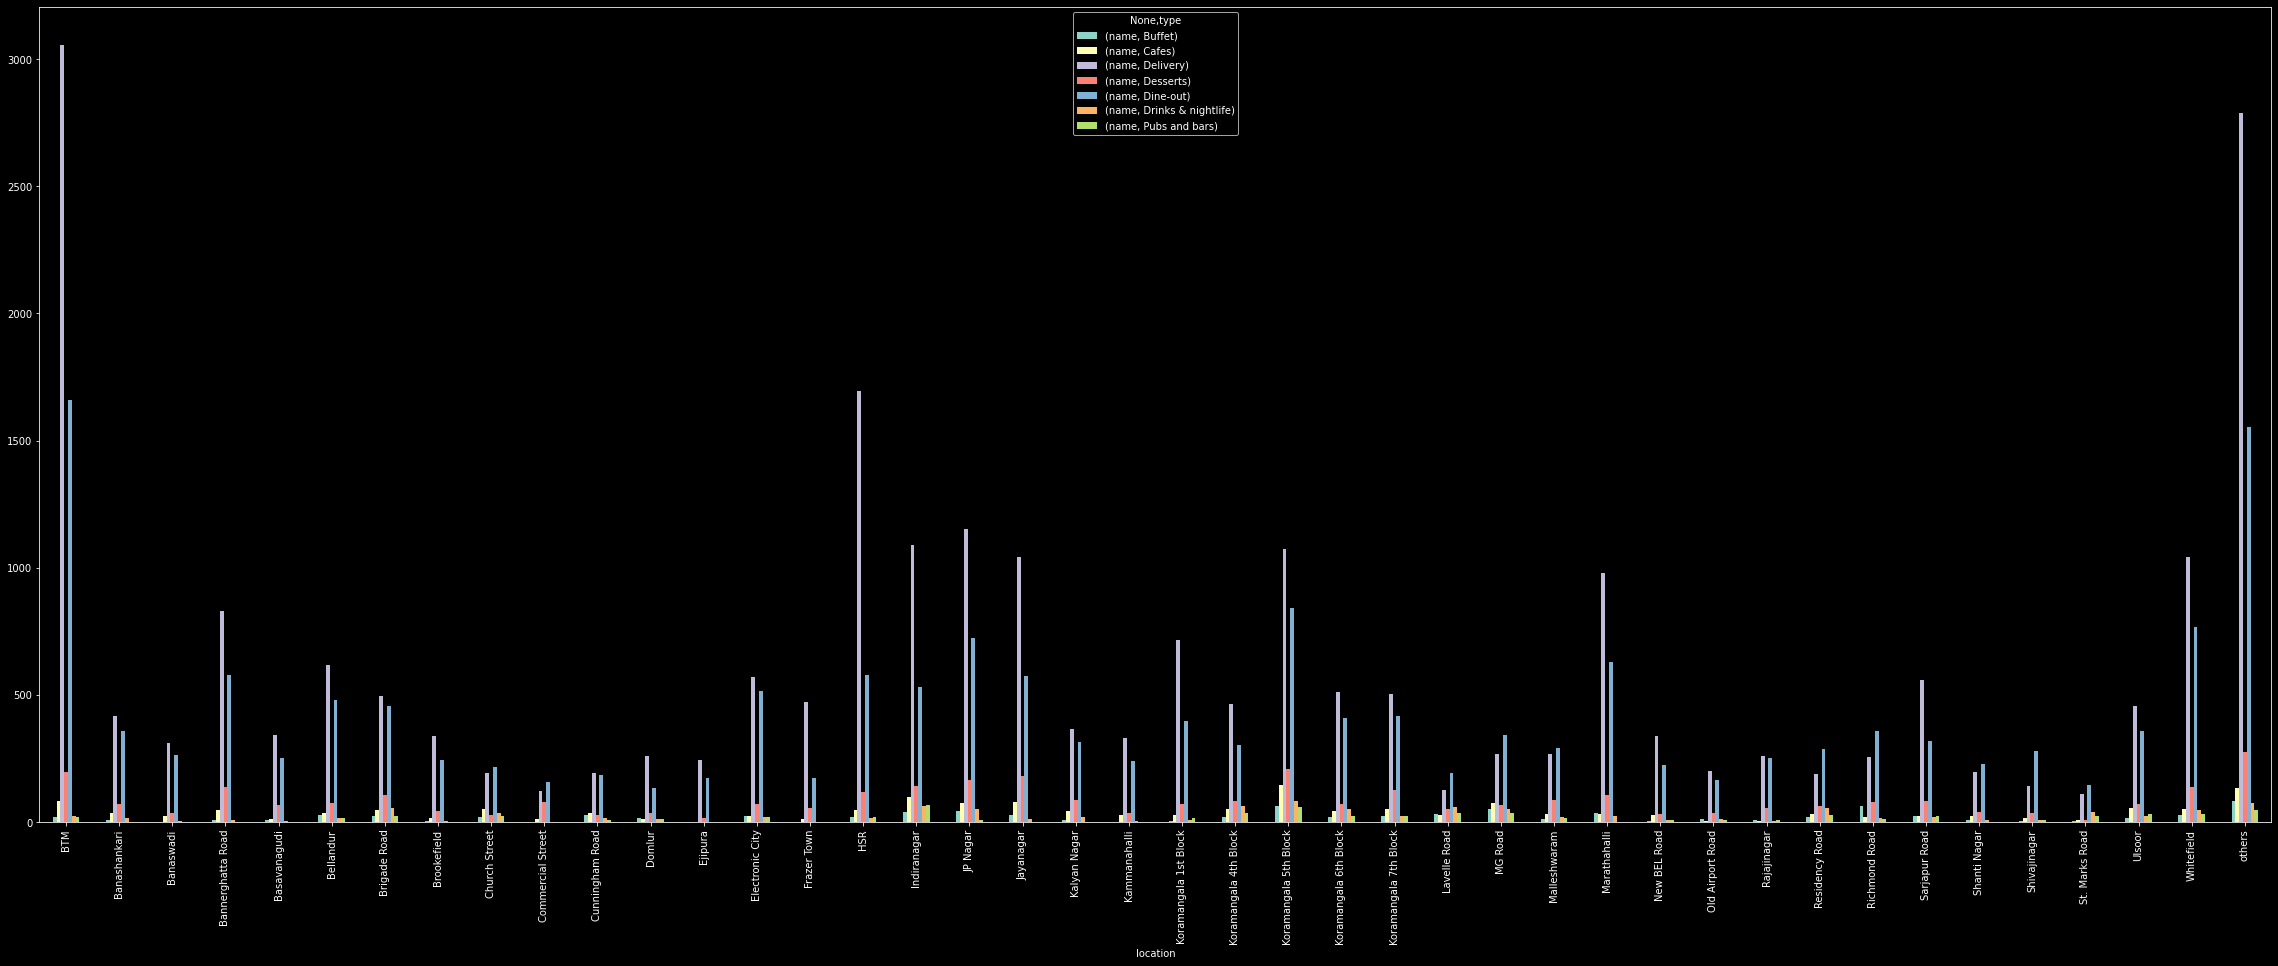

In [ ]:
data3.plot(kind="bar", figsize=(40,15))


#No.of votes, location wise

In [ ]:
data4=data[['location', 'votes']]
data4.drop_duplicates()
data5=data4.groupby(['location'])['votes'].sum()
data5=data5.to_frame()
data5=data5.sort_values('votes', ascending=False)
data5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


above are the votes, location wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

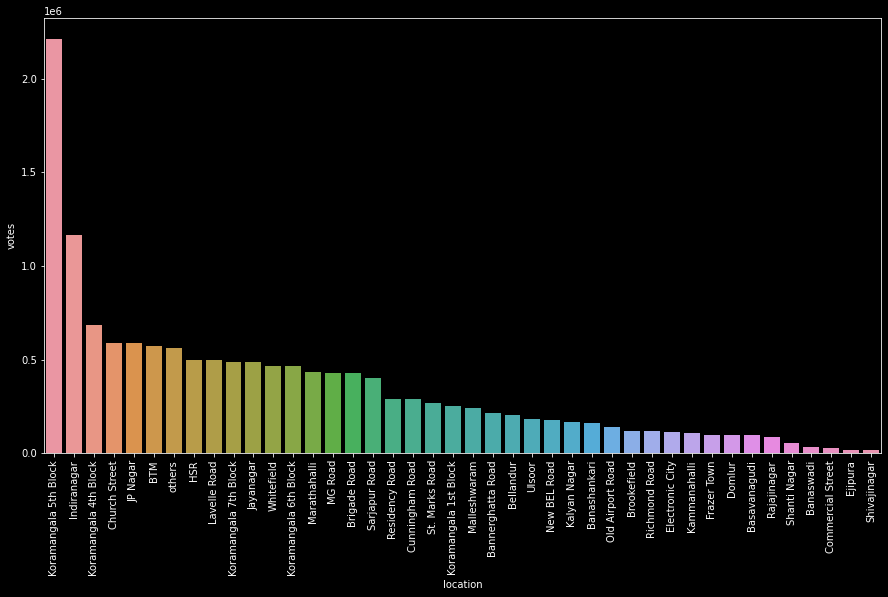

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data5.index, data5["votes"])
plt.xticks(rotation=90)

above one says about the location wise customers interest in voting or giving feed back

#visualsing top cuisines

In [ ]:
data6= data[['cuisines', 'votes']]
data6.drop_duplicates()
data7=data6.groupby(['cuisines'])['votes'].sum()
data7=data7.to_frame()
data7=data7.sort_values('votes', ascending=False)
data7.head()

,votes
cuisines,
others,12798334
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
Chinese,101728


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

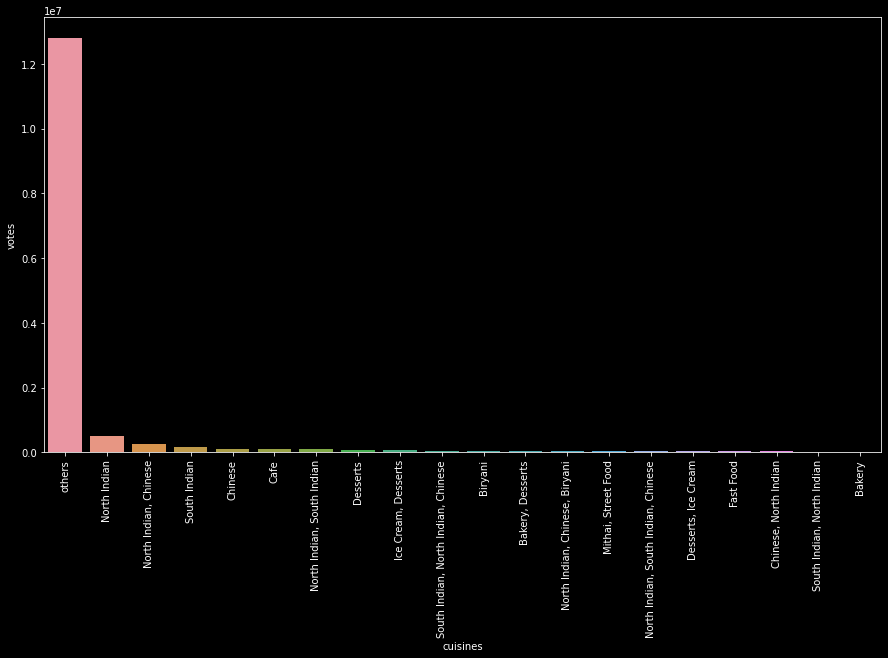

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data7.index, data7["votes"])
plt.xticks(rotation=90)

In [ ]:
#removing others 
data7=data7.iloc[1:, :]
data7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
Chinese,101728
Cafe,89986


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

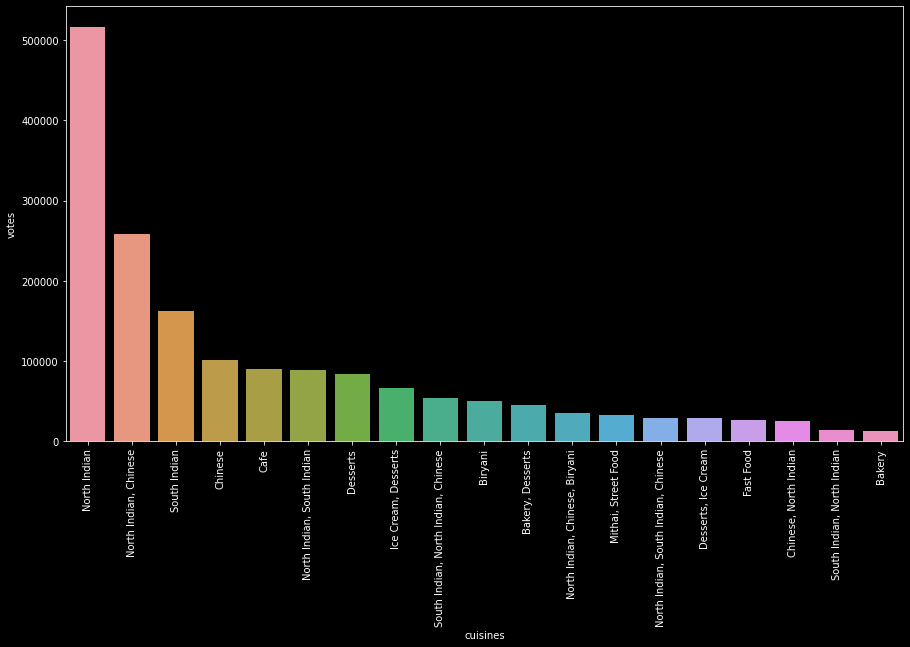

In [ ]:
#after removing others
plt.figure(figsize=(15,8))
sns.barplot(data7.index, data7["votes"])
plt.xticks(rotation=90)

Above says highest votes are given to north indian cuisines 